## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

There is in fact a close relationship between hypothesis testing and confidence intervals. If the null hypothesis corresponds to a range of values for a population parameter that are excluded from the confidence interval, then the null hypothesis must be rejected with a very low P value. The lower, the higher the confidence level of he interval.

To exemplify this we go back to our example of the election poll and reformulate it as hypothesis testing.

In [5]:
poll = pd.read_csv('poll.csv')

In [7]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

To remind you, in the smaller poll Brown had a seeming majority of votes.

So here the null hypothesis will be that Green wins or ties the election, so the true Brown fraction would be 0.50 or less.

We need to find out whether a Brown proportion of 0.511 is an extreme result if the null hypothesis holds. So we compute the sampling distribution of the proportion, and get a true Brown fraction of 0.50. If it's lower than that the P value will be even lower. So we can work with 0.50.

Here's a function to simulate the sample of a thousand. Once again, we use numpy random rand and compare uniformly distributed numbers between zero and one with the Brown fraction. Then we use numpy where and return Brown if the condition holds true or Green otherwise. Finally, we enclose everything in a data frame.

In [9]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

And here's the sampling distribution. We call sample, grab the votes and count them, and then repeat, collect the results in a list comprehension and then close in the data frame.

In [11]:
dist = pd.DataFrame({'Brown': [sample(0.5, 1000).vote.value_counts(normalize=True)['Brown'] for i in range(1000)]})

We histogram the sampling distribution, and we see that indeed 0.511 is not a very extreme value.

<AxesSubplot:>

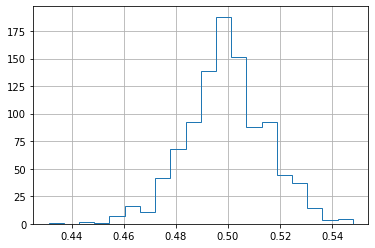

In [12]:
dist.Brown.hist(histtype='step', bins=20)

If we look for its quantile we see that the corresponding P value is 24%, certainly not enough to reject the null hypothesis that Green ties or wins.

In [15]:
100 - scipy.stats.percentileofscore(dist.Brown, 0.51)

23.150000000000006

What about the larger sample?

Here, it makes sense to set the null hypothesis to Brown winning or tying since Green seems to have the majority. In fact, a nice feature of binary problems, such as this, is that the null hypothesis and its alternative are complementary.

So I load the data

In [16]:
largepoll = pd.read_csv('poll-larger.csv')

look at the counts

In [17]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

and again, compute a sampling distribution at the fraction of 0.50, this time for Green, when the sample's at 10,000. This takes longer, so we compute only 1,000 repetitions.

In [19]:
dist = pd.DataFrame({'Green': [sample(0.50, 10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

Let's see a histogram, and let's overlay Brown's value of 0.5181.

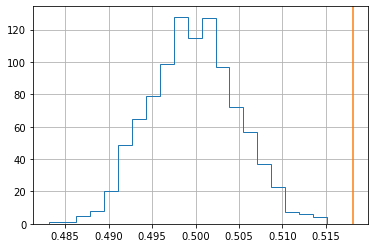

In [23]:
dist.Green.hist(histtype='step', bins=20)
pp.axvline(0.5181, c='C1')

Here, the value is so extreme that it's not even included in our finite sampling distribution. We conclude that the P value for rejecting the null hypothesis that Brown wins or ties is one over 1000 or less, which qualifies as very significant.

An interesting question is whether one can apply bootstrapping to compute the values. It is all trivial, because bootstrapping can only represent the true distribution, not the distribution under the null hypothesis, so we would need to modify the bootstrap values to be appropriate for the null case, which in some cases is straightforward and not as impossible. Certainly, it requires some thinking and problem specific information. Doing so, is outside the scope of our course.